

{% include toc title="In This Lesson" icon="file-text" %}



## Get started with date formats in R



In this tutorial, we will look at the date time format - which is important for

plotting and working with time series data in R.



<div class='notice--success' markdown="1">



## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives



At the end of this activity, you will be able to:



* Convert column in a dataframe containing dates / times to a date/time object that can be used in R.

* Be able to describe how we can use the data class 'date' to create easier to read time series plots in `R`.



## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What you need



You need `R` and `RStudio` to complete this tutorial. Also you should have

an `earth-analytics` directory setup on your computer with a `/data`

directory with it.



* [How to Setup R / RStudio](/course-materials/earth-analytics/week-1/setup-r-rstudio/)

* [Setup your working directory](/course-materials/earth-analytics/week-1/setup-working-directory/)

* [Intro to the R & RStudio Interface](/course-materials/earth-analytics/week-1/intro-to-r-and-rstudio)



</div>





In this tutorial, we will learn how to convert data that contain dates and times

into a date / time format in R.



First let's revisit the boulder precip data that we've been working with in

this module.




In [1]:
import earthlab as et
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.ion()

In [2]:
os.chdir('/Users/choldgraf/earth-analytics/')

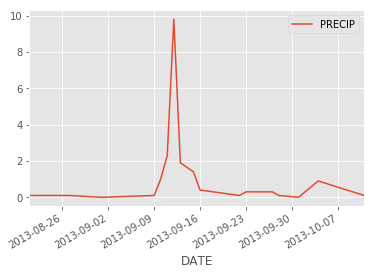

In [3]:
boulder_precip = pd.read_csv('./data/week_02/boulder-precip.csv', parse_dates=['DATE'], index_col=0)
boulder_precip.plot('DATE', 'PRECIP')

In [4]:
# ```{r import-data, fig.cap="quick plot of precip data"}

# # load the ggplot2 library for plotting

# library(ggplot2)



# # download data from figshare

# # note that we already downloaded the data in the previous exercises so this line

# # is commented out. If you want to redownload the data, umcomment the line below.

# # download.file(url = "https://ndownloader.figshare.com/files/7010681",

# #             destfile = "data/boulder-precip.csv")



# # import data

# boulder_precip <- read.csv(file="data/boulder-precip.csv")



# # view first few rows of the data

# head(boulder_precip)



# qplot(x=boulder_precip$DATE,

#       y=boulder_precip$PRECIP)

# ```




We know how to use `ggplot()` now so let's use that instead.




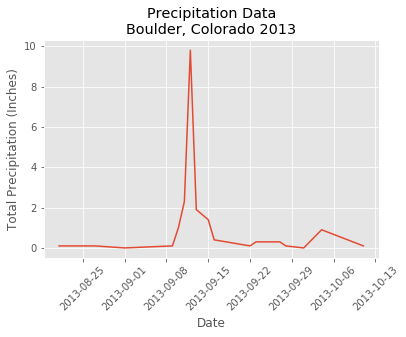

In [5]:
fig, ax= plt.subplots()
ax.plot('DATE', 'PRECIP', data=boulder_precip)
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set(xlabel="Date",
       ylabel="Total Precipitation (Inches)",
       title="Precipitation Data\nBoulder, Colorado 2013");

In [6]:
# ```{r ggplot-plot, fig.cap="ggplot of precip data" }

# # plot the data using ggplot

# ggplot(data=boulder_precip, aes(x=DATE, y=PRECIP)) +

#   geom_point() +

#   glabs(x="Date",

#     y="Total Precipitation (Inches)",

#     title="Precipitation Data"

#     subtitle="Boulder, Colorado 2013")



# ```




Notice when we plot the data, the x axis is "messy". It would be easier to read

if we only had ticks on the x axis for dates incrementally - every few weeks. Or

once a month even.



Let's look closely at the STRUCTURE of the data to understand why R is placing

so many labels on the x axis.






In [7]:
# not sure how this maps onto python

In [8]:
# ```{r structure}

# str(boulder_precip)



# ```






## Data types (classes) in R



The structure results above tell us that the data columns in our `data.frame`

are stored as several different data types or `classes` as follows:



* **chr - Character:** It holds strings that are composed of letters and

words. Character class data can not be interpreted numerically - that is to say

we can not perform math on these values even if they contain only numbers.

* **int - Integer:**  It holds numbers that are whole integers without decimals.

Mathematical operations can be performed on integers.

* **num - Numeric:**  It accepts data that are a wide variety of numeric formats

including decimals (floating point values) and integers. Numeric also accept

larger numbers than **int** will.



### Data frame columns can only contain one data class



A `data.frame` column can only store on type. This means that a column can not

store both numbers and strings. If a column contains a list of numbers and one

letter, then the entire column will stored as a `chr` (character).



Storing

variables using different `classes` is a strategic decision by `R` (and

other programming languages) that optimizes processing and storage. It allows:



* data to be processed more quickly & efficiently.

* the program (`R`) to minimize the storage size.



Remember, that we also discussed classes during class in these lessons: [vectors in R - data classes](/course-materials/earth-analytics/week-2/work-with-data-types-r/)



## Dates stored as characters

Note that the Date column in our data.frame is of class character (chr). This

means that R  is reading it in as letters and numbers rather than dates that

contain a value that is sequential.




In [14]:
boulder_precip.dtypes

DATE      datetime64[ns]
PRECIP           float64
dtype: object

In [1]:
# ```{r view-class }

# # View data class for each column that we wish to plot

# class(boulder_precip$DATE)



# class(boulder_precip$PRECIP)



# ```




Thus, when we plot, `R` tries to plot EVERY date value in our data, on

the x-axis. This makes it hard to read. But also it makes it hard to work with

the data. For instance - what if we wanted to subset out a particular time period

from our data? We can't do that if the data are stored as characters.



The `PRECIP` data is numeric so that variable plots just fine.



## Convert date to an R date class



We need to convert our `date` column, which is currently stored as a character

to a `date` class that can be displayed as a continuous variable. Lucky

for us, `R` has a `date` class. We can convert the `date` field to a `date class`

using the function `as.Date()`.



When we convert, we need to tell R how the date is formated - where it can find

the month, day and year and what format each element is in.



For example: 1/1/10 vs 1-1-2010



Looking at the results above, we see that our data are stored in the format:

Year-Month-Day (2003-08-21). Each part of the date is separated in this case with

a `-`. We can use this information to populate our format

string using the following designations for the components of the date-time data:



* %Y - year

* %m - month

* %d - day



Our format string will look like this: `%Y-%m-%d`. Notice that we are telling

R where to find the year (%Y), month (%m) and day (%d). Also notice that we

include the dashes that separate each component in each date cell of our data.



NOTE: look up `?strptime` to see all of the date "elements" that you can use to

describe the format of a date string in R.

{: .notice--success}






In [ ]:
# These are already parsed as dates in python...maybe we don't wanna do that?

In [1]:
# ```{r convert-date-time }

# # convert date column to date class

# boulder_precip$DATE <- as.Date(boulder_precip$DATE,

#                         format="%Y-%m-%d")



# # view R class of data

# class(boulder_precip$DATE)



# # view results

# head(boulder_precip$DATE)

# ```




Now that we have adjusted the date, let's plot again. Notice that it plots

much more quickly now that R recognizes `date` as a date class. `R` can

aggregate ticks on the x-axis by year instead of trying to plot every day!




In [1]:
# ```{r qplot-data, fig.cap="precip bar plot"}

# # quickly plot the data and include a title using main=""

# # In title string we can use '\n' to force the string to break onto a new line



# ggplot(data=boulder_precip, aes(x=DATE, y=PRECIP)) +

#       geom_bar(stat="identity") +

#       ggtitle("Precipitation")



# ```
